In [1]:
import pandas as pd
import leather

In [2]:
# Import data
straight = pd.read_csv('kent-county-straight-party.csv', index_col=0)
individual = pd.read_csv('kent-county-individual.csv', index_col=0)

In [3]:
# Rename columns to easier names
new_col_names = {
    'Registered voters': 'registered_voters',
    'Ballots Cast': 'ballots_cast',
    'Turnout': 'turnout',
    'Democratic Party': 'dem',
    'Republican Party': 'rep',
    'Libertarian Party': 'lib',
    'US Taxpayers Party': 'tax',
    'Working Class Party': 'work',
    'Green Party': 'green',
    'Natural Law Party': 'law'
}
straight.rename(columns=new_col_names, inplace=True)
# Calculate total number of straight-party ballots
straight['total_straight'] = straight.loc[:, 'dem':'law'].sum(axis=1)
# Calculate percentage of straight-party ballots to Dems and Reps, respectively
straight['pct_dem'] = straight['dem'] / straight['total_straight'] * 100
straight['pct_rep'] = straight['rep'] / straight['total_straight'] * 100
# Get rid of the extra columns
straight = straight[['dem', 'rep', 'pct_dem', 'pct_rep']]
# Delete first row of totals
straight.drop('TOTAL', inplace=True)
straight

,dem,rep,pct_dem,pct_rep
TOTALS: 252 of 252,,,,
Ada Township Precinct 1,256,308,45.149912,54.320988
Ada Township Precinct 2,452,531,45.702730,53.690597
Ada Township Precinct 3,212,365,36.614853,63.039724
Ada Township Precinct 4,167,410,28.842832,70.811744
Ada Township Precinct 5,269,705,27.309645,71.573604
...,...,...,...,...
Wyoming City Ward 3 Precinct 26,254,274,47.476636,51.214953
Wyoming City Ward 3 Precinct 27,234,328,41.197183,57.746479
Wyoming City Ward 3 Precinct 28,379,647,36.583012,62.451737


In [4]:
# Rename columns to easier names
new_col_names = {
    'Registered voters': 'registered_voters',
    'Ballots Cast': 'ballots_cast',
    'Turnout': 'turnout',
    'Joseph R. Biden w/ Kamala D. Harris': 'biden',
    'Donald J. Trump w/ Michael R. Pence': 'trump',
    'Jo Jorgensen w/ Jeremy Cohen': 'jorgensen',
    'Don Blankenship w/ William Mohr': 'blankenship',
    'Howie Hawkins w/ Angela Walker': 'hawkins',
    'Rocky De La Fuente w/ Darcy Richardson': 'de_la_fuente',
    'Total write-in': 'total_write_in'
}
individual.rename(columns=new_col_names, inplace=True)
# Calculate total number of individual ballots
individual['total_individual'] = individual.loc[:, 'biden':'total_write_in'].sum(axis=1)
# Calculate percentage of individual ballots to Biden and Trump, respectively
individual['pct_biden'] = individual['biden'] / individual['total_individual'] * 100
individual['pct_trump'] = individual['trump'] / individual['total_individual'] * 100
# Get rid of the extra columns
individual = individual[['biden', 'trump', 'pct_biden', 'pct_trump']]
# Delete first row of totals
individual.drop('TOTAL', inplace=True)
individual

,biden,trump,pct_biden,pct_trump
TOTALS: 252 of 252,,,,
Ada Township Precinct 1,593,473,54.553818,43.514259
Ada Township Precinct 2,1043,886,52.997967,45.020325
Ada Township Precinct 3,512,592,44.716157,51.703057
Ada Township Precinct 4,402,554,41.273101,56.878850
Ada Township Precinct 5,682,1032,38.816164,58.736483
...,...,...,...,...
Wyoming City Ward 3 Precinct 26,526,419,54.507772,43.419689
Wyoming City Ward 3 Precinct 27,461,476,48.070907,49.635036
Wyoming City Ward 3 Precinct 28,761,981,42.824986,55.205402


In [5]:
# Merge the data into a single table (unnecessary, but helpful)
data = straight.merge(individual, left_index=True, right_index=True)
data

,dem,rep,pct_dem,pct_rep,biden,trump,pct_biden,pct_trump
TOTALS: 252 of 252,,,,,,,,
Ada Township Precinct 1,256,308,45.149912,54.320988,593,473,54.553818,43.514259
Ada Township Precinct 2,452,531,45.702730,53.690597,1043,886,52.997967,45.020325
Ada Township Precinct 3,212,365,36.614853,63.039724,512,592,44.716157,51.703057
Ada Township Precinct 4,167,410,28.842832,70.811744,402,554,41.273101,56.878850
Ada Township Precinct 5,269,705,27.309645,71.573604,682,1032,38.816164,58.736483
...,...,...,...,...,...,...,...,...
Wyoming City Ward 3 Precinct 26,254,274,47.476636,51.214953,526,419,54.507772,43.419689
Wyoming City Ward 3 Precinct 27,234,328,41.197183,57.746479,461,476,48.070907,49.635036
Wyoming City Ward 3 Precinct 28,379,647,36.583012,62.451737,761,981,42.824986,55.205402


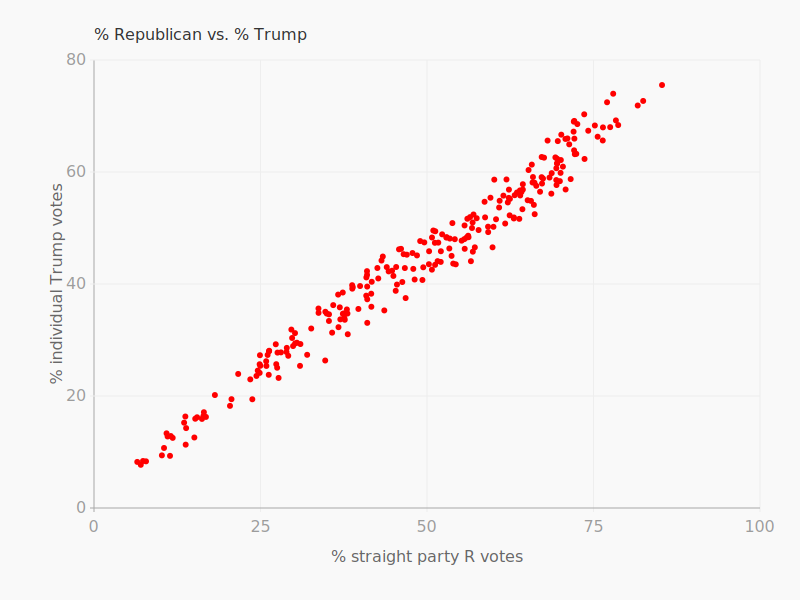

In [6]:
rep_vs_trump = list(zip(data['pct_rep'], data['pct_trump']))
rep_trump_chart = leather.Chart('% Republican vs. % Trump')
rep_trump_chart.add_dots(rep_vs_trump, radius=3, fill_color='red')
rep_trump_chart.add_x_axis(name='% straight party R votes')
rep_trump_chart.add_y_axis(name='% individual Trump votes')
rep_trump_chart.to_svg()

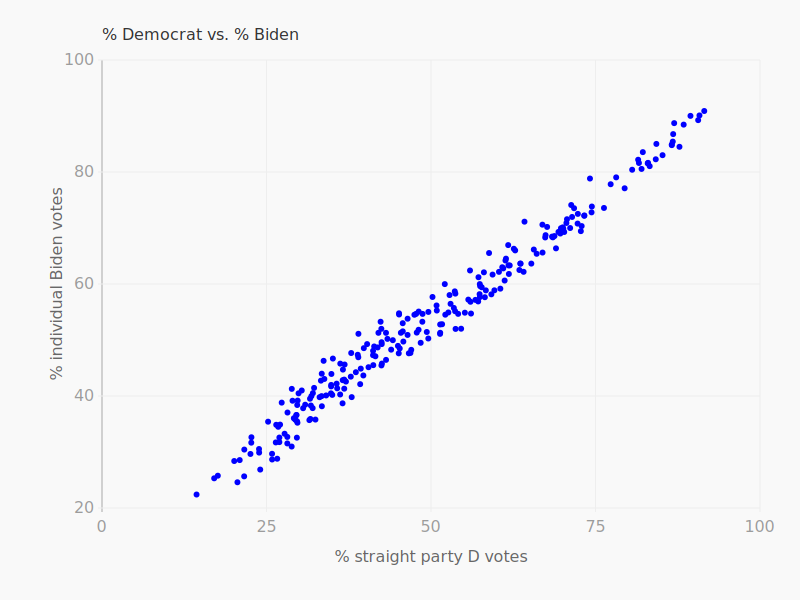

In [7]:
dem_vs_biden = list(zip(data['pct_dem'], data['pct_biden']))
dem_biden_chart = leather.Chart('% Democrat vs. % Biden')
dem_biden_chart.add_dots(dem_vs_biden, radius=3, fill_color='blue')
dem_biden_chart.add_x_axis(name='% straight party D votes')
dem_biden_chart.add_y_axis(name='% individual Biden votes')
dem_biden_chart.to_svg()